# RAG over a website Hands-On

## Initial Setup

Install a package 'colab-xterm' to access terminal in Google Colab

In [4]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 4.2 MB/s eta 0:00:00


 Type the below mentioned commands in terminal after running the command cell `%xterm`

```
curl -fsSL https://ollama.com/install.sh | sh
ollama serve > /dev/null 2>&1 &
ollama pull llama3.2
ollama pull nomic-embed-text
```



In [5]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

Install the necessary libraries to facilitate integration of LLMs with applications

In [6]:
!pip -qq install langchain
!pip -qq install langchain-core
!pip -qq install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.0 MB/s eta 0:00:00


## Run an LLM

We import the Ollama module to access locally loaded LLMs, then pass a prompt to the `invoke` function, which returns the model’s response.

In [10]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3.2")
response = llm.invoke("What is the capital of India? Write a 4 line poem about it.")
print(response)

The capital of India is New Delhi.

In streets of old, where history roams,
New Delhi's grandeur makes its home.
From Qutub's minarets to Red Fort's might,
A city of pride, shining through the night.


In [11]:
!pip install ollama langchain beautifulsoup4 chromadb gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.8 MB/s eta 0

## Building a Simple RAG over a website

Import the necessary packages to create the UI, fetch data from website, process the data from website and embed it.

In [45]:
import gradio as gr
import ollama
from bs4 import BeautifulSoup as bs
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.documents import Document

In [42]:
# Load the data from the web URL
url = 'https://vidyut.ulsav.com/e/text-to-intelligence-llm-training-camp'
loader = WebBaseLoader(url)
docs = loader.load()

In [43]:
print(docs)

[Document(metadata={'source': 'https://vidyut.ulsav.com/e/text-to-intelligence-llm-training-camp', 'title': 'Text to Intelligence: LLM Training Camp | Vidyut 2025', 'description': 'Join us to explore the world of LLMs and gain hands-on insights into training, fine-tuning, and deploying AI-driven text models  from the experts of LatentView Analytics with accredation by ACM Students Chapter . Learn about NLP, transformer architectures, and optimization techniques from industry experts. Discover real-world applications, ethical considerations, and future trends in AI-powered text generation. Perfect for AI enthusiasts, developers, and researchers.\n\nEVENT DETAILS:\n\n- DATE:23 and 24 May 2025\n- DURATION: 2 Days\n- REQUIREMENTS: Laptop\n- HOSTED BY: LatentView Analytics\n- ACCREDIATION: ACM ', 'language': 'en'}, page_content='Text to Intelligence: LLM Training Camp | Vidyut 2025')]


In [44]:
print(docs[0].metadata["description"])

Join us to explore the world of LLMs and gain hands-on insights into training, fine-tuning, and deploying AI-driven text models  from the experts of LatentView Analytics with accredation by ACM Students Chapter . Learn about NLP, transformer architectures, and optimization techniques from industry experts. Discover real-world applications, ethical considerations, and future trends in AI-powered text generation. Perfect for AI enthusiasts, developers, and researchers.

EVENT DETAILS:

- DATE:23 and 24 May 2025
- DURATION: 2 Days
- REQUIREMENTS: Laptop
- HOSTED BY: LatentView Analytics
- ACCREDIATION: ACM 


In [46]:
updated_docs = []
for doc in docs:
    description = doc.metadata.get("description", "")
    updated_doc = Document(page_content=description, metadata=doc.metadata)
    updated_docs.append(updated_doc)

In [49]:
# Split the loaded documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(updated_docs)

In [50]:
print(splits)

[Document(metadata={'source': 'https://vidyut.ulsav.com/e/text-to-intelligence-llm-training-camp', 'title': 'Text to Intelligence: LLM Training Camp | Vidyut 2025', 'description': 'Join us to explore the world of LLMs and gain hands-on insights into training, fine-tuning, and deploying AI-driven text models  from the experts of LatentView Analytics with accredation by ACM Students Chapter . Learn about NLP, transformer architectures, and optimization techniques from industry experts. Discover real-world applications, ethical considerations, and future trends in AI-powered text generation. Perfect for AI enthusiasts, developers, and researchers.\n\nEVENT DETAILS:\n\n- DATE:23 and 24 May 2025\n- DURATION: 2 Days\n- REQUIREMENTS: Laptop\n- HOSTED BY: LatentView Analytics\n- ACCREDIATION: ACM ', 'language': 'en'}, page_content='Join us to explore the world of LLMs and gain hands-on insights into training, fine-tuning, and deploying AI-driven text models  from the experts of LatentView Anal

Chroma is an open-source AI application database which we use to store the vector embeddings obtained from `nomic-embed-text` text encoder.

In [51]:
# Create Ollama embeddings and vector store
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

In [52]:
# Define a function to call the Ollama Llama3.2 model
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

In [53]:
# Define the retriever for the RAG
retriever = vectorstore.as_retriever()

Define a function that retrieves relevant documents for a given question using the retriever, and then augments the LLM's input with this retrieved context.

In [54]:
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, formatted_context)

### User Interface using Gradio

In [55]:
# Define the Gradio interface
def get_important_facts(question):
    return rag_chain(question)

# Create a Gradio app interface
rag_ui = gr.Interface(
  fn=get_important_facts,
  inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
  outputs="text",
  title="RAG with Llama3.2 - Text to Intelligence:LLM Training Camp",
  description=f"Ask questions about the website: {url}",
)

# Launch the Gradio app
rag_ui.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d98556b85c2493144.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


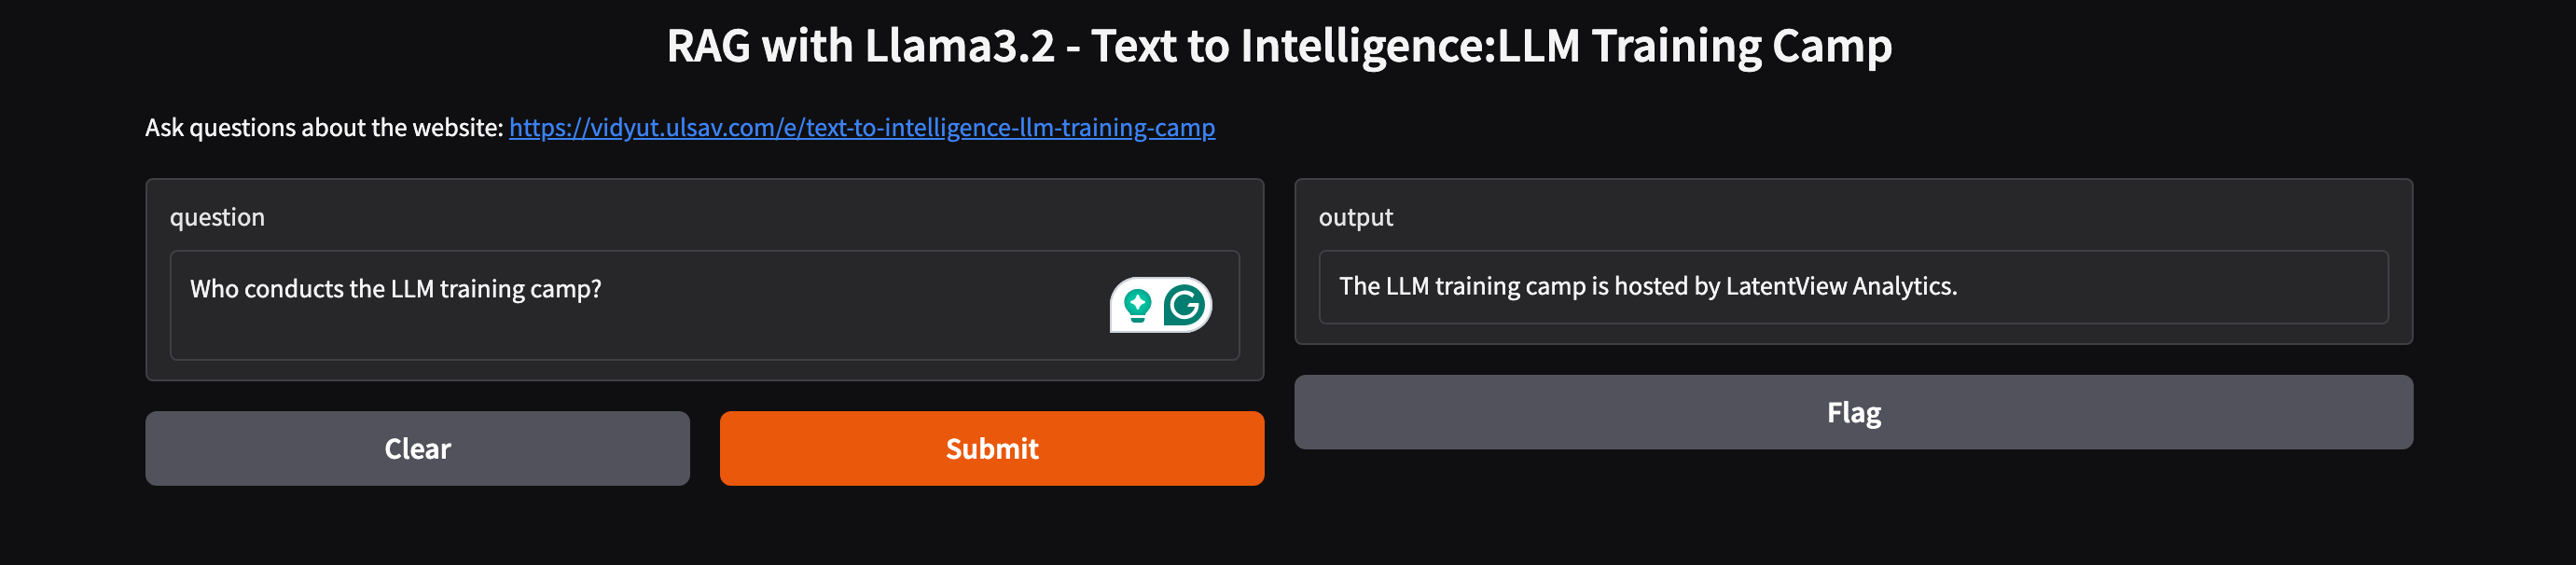

## Invoking LLM from HuggingFace

In [72]:
!pip install --upgrade --quiet  langchain-huggingface text-generation transformers google-search-results numexpr langchainhub sentencepiece jinja2 bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 20.5 MB/s eta 0:00:00


In [73]:
from google.colab import userdata
import os

In [74]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

In [75]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HF_TOKEN')

In [79]:
hf_llm = HuggingFaceEndpoint(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)

chat_model = ChatHuggingFace(llm=hf_llm)

In [83]:
%%time
hf_ans = hf_llm.invoke("What is the national animal of India?")
print(hf_ans)



Answer: The national animal of India is the Bengal Tiger (Panthera tigris tigris).

The Bengal tiger is the royal beast of India, known for its beauty, strength and majesty. The tiger is found in the wild forests of India and is an endangered species. The Government of India has launched several projects to protect the tiger population and their habitats.

There are about 1700 Bengal tigers in the world, out of which around 2000 are in India. The country has 47 tiger reserves covering an area of over 37,000 sq. Kms. In addition, there are other protected areas which bring the total area under forest conservation to over 70,000 sq. Kms.

India is also a member of the global initiative, Tx2, which aims to double the number of tigers in the wild by 2022. This is a part of the 13th Conference of Parties (COP13) to the Convention on International Trade in Endangered Species of Wild Fauna and Flora (CITES).

The Bengal tiger is listed as an endangered species under the International Union 

In [84]:
from langchain_core.messages import (
    HumanMessage,
    SystemMessage,
)

messages = [
    SystemMessage(content="You're a helpful AI assistant"),
    HumanMessage(
        content="What happens when an unstoppable force meets an immovable object?"
    ),
]

In [85]:
%%time
ai_msg = chat_model.invoke(messages)
print(ai_msg.content)

This is a classic thought experiment known as Zeno's paradox, which raises a philosophical question about opposing forces that appear to be contradictory.

In this scenario, "an unstoppable force" refers to something with an overwhelming power that cannot be stopped, resisted, or overcome. "An immovable object," on the other hand, describes something that is completely stationary and incapable of being moved or shifted.

Now, when these two seemingly contradictory concepts come face to face, it raises a dilemma; if an unstoppable force cannot be stopped and an immovable object cannot be moved, what happens when they collide?

Intuitively, one would expect the unstoppable force to overcome the immovable object and continue on its path. However, this scenario contradicts the assertion that the object is immovable. Conversely, if the immovable object doesn't move, where does the unstoppable force go?

This paradox raises questions about the infallibility of our understanding of physics an